## Introduction
This notebook is for testing the readability of the result dataset. Run this after generating the data using the example script `mpi_test.py`

In [53]:
import zarr

dataset_path = './example_data/dataset.zarr'

# Open the dataset in read mode
root = zarr.open_group(dataset_path, mode='r')

# Access the arrays
X_flux = root["X_flux_coeffs"]
X_wts  = root["X_weights"]
Y_flux = root["Y_flux_coeffs"]
Y_pow  = root["Y_power_coeffs"]

# Print dataset shapes
print("X_flux shape:", X_flux.shape)
print("X_weights shape:", X_wts.shape)
print("Y_flux shape:", Y_flux.shape)
print("Y_power shape:", Y_pow.shape)

X_flux shape: (10, 4, 5, 5, 8, 1)
X_weights shape: (10, 4)
Y_flux shape: (10, 4, 5, 5, 8, 1)
Y_power shape: (10, 15)


Plot an example incident/outgoing flux, pin power example

Text(0, 0.5, 'Flux')

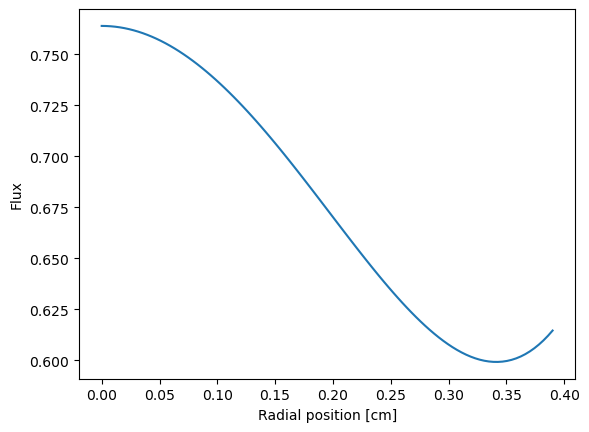

In [54]:
from pincell_moment_utils.datagen import DefaultPincellParameters
import openmc
import matplotlib.pyplot as plt
import numpy as np

sample = 3
params = DefaultPincellParameters()
radius = params.fuel_or

# First plot radial pincell flux profile
zz = openmc.Zernike(Y_pow[sample], radius)
rr = np.linspace(0, radius, 100)
plt.plot(rr, zz(rr, 0.0)) 
plt.xlabel('Radial position [cm]')
plt.ylabel('Flux')

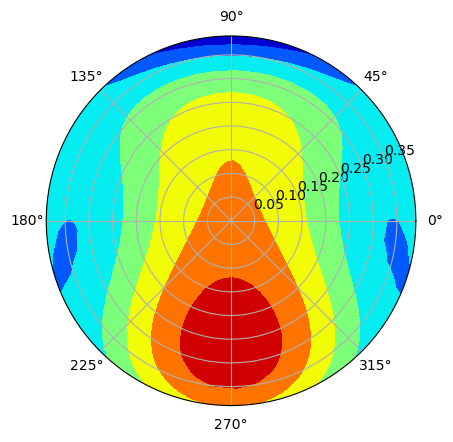

In [55]:
# Now do a polar plot
zz = openmc.Zernike(Y_pow[sample], radius=radius) 
#
# Using linspace so that the endpoint of 360 is included...
azimuths = np.radians(np.linspace(0, 360, 50))
zeniths = np.linspace(0, radius, 100)
r, theta = np.meshgrid(zeniths, azimuths)
values = zz(zeniths, azimuths)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, r, values, cmap='jet')
plt.show()

These profiles admittedly look very strange, but perhaps this is to be expected from randomly generated surface expansion profiles

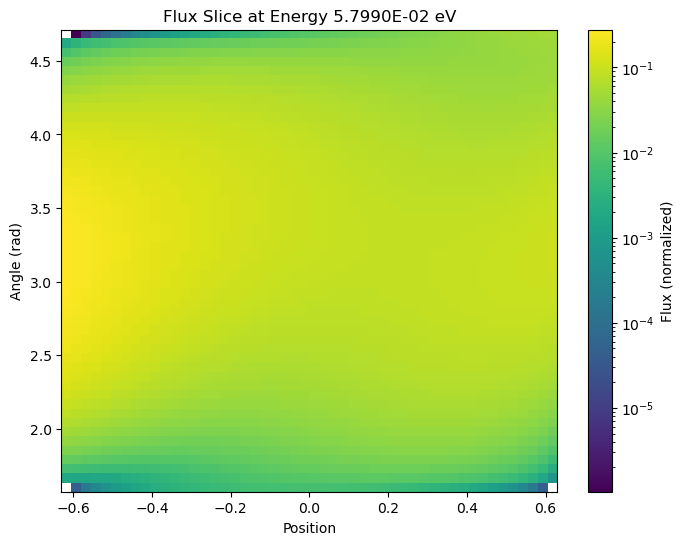

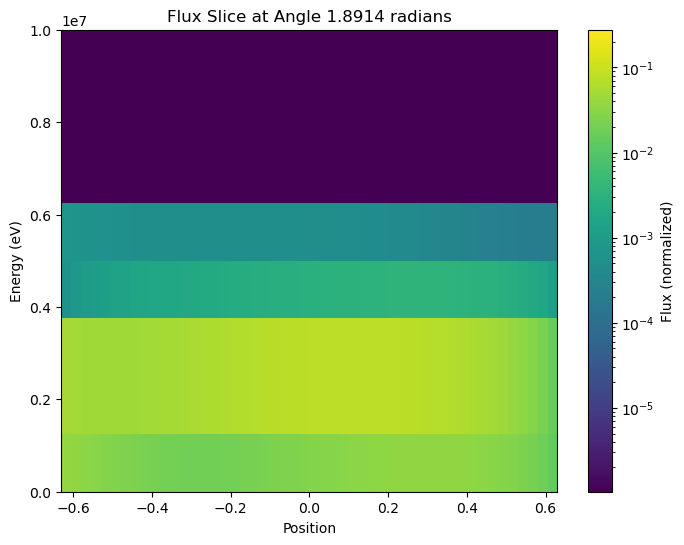

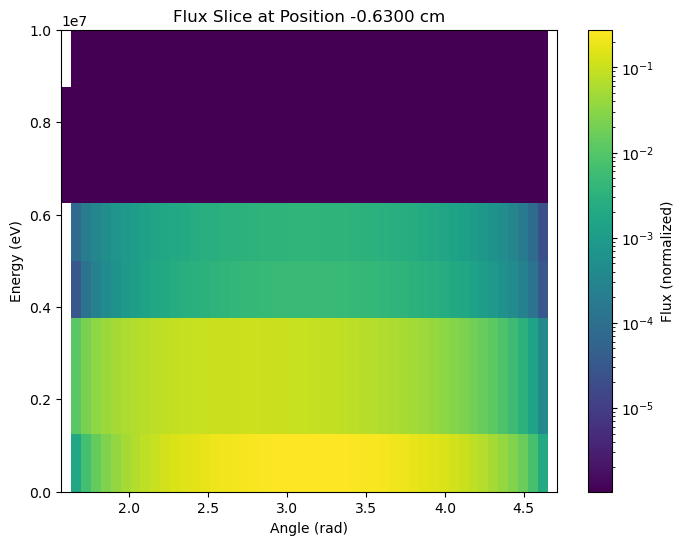

In [56]:
import pincell_moment_utils.postprocessing as pp
from pincell_moment_utils.plotting import plot_expansion

incident_flux = pp.surface_expansion(X_flux[sample], params.energy_filters, incident=True)
outgoing_flux = pp.surface_expansion(Y_flux[sample], params.energy_filters, incident=False)


plot_expansion(incident_flux, 0, 5, 0, 0, 50, 50, incident=True)

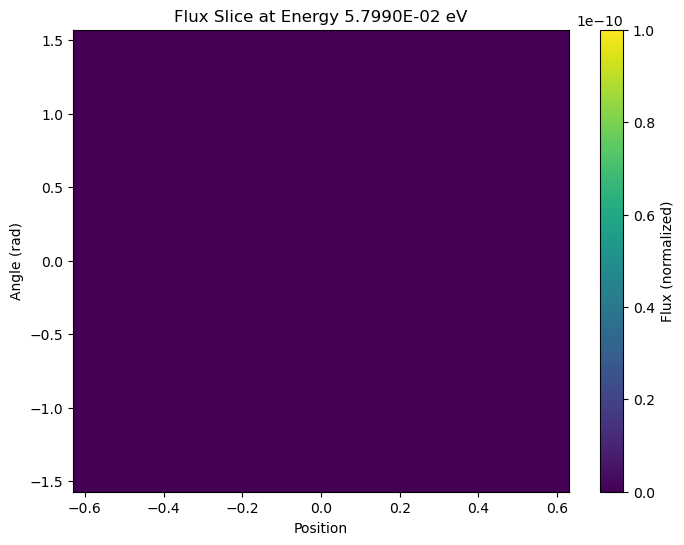

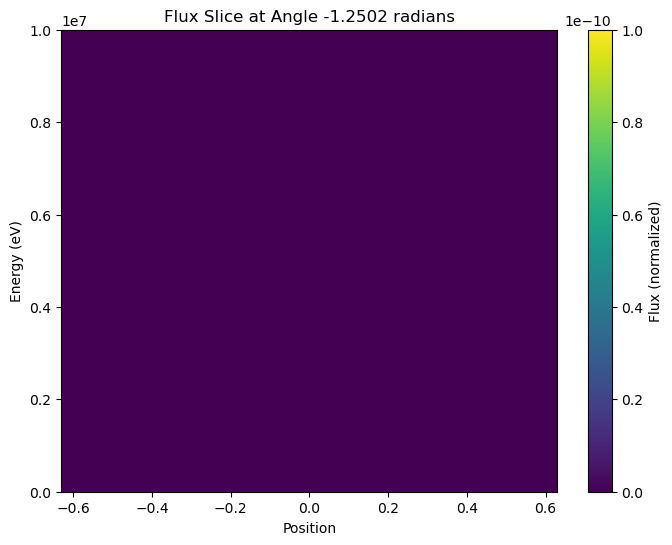

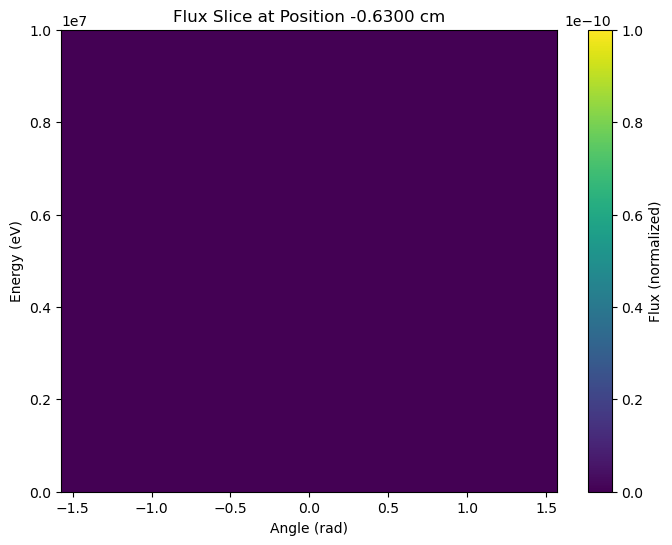

In [57]:
plot_expansion(outgoing_flux, 0, 5, 0, 0, 50, 50, incident=False)

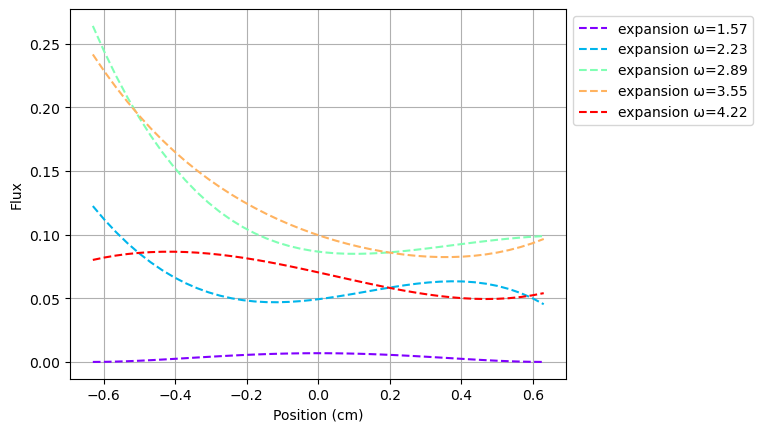

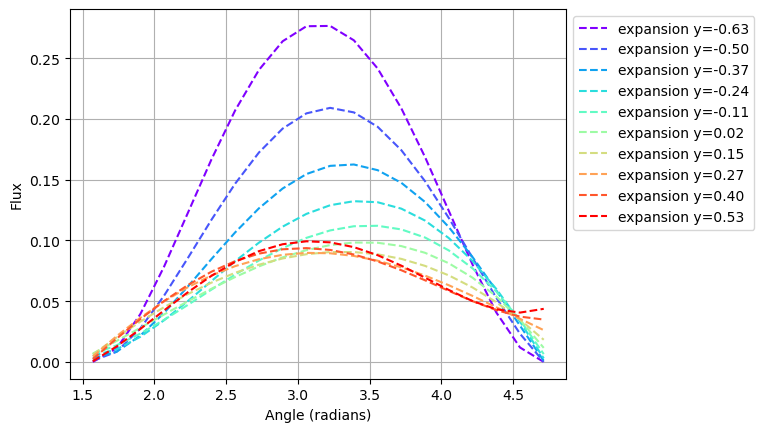

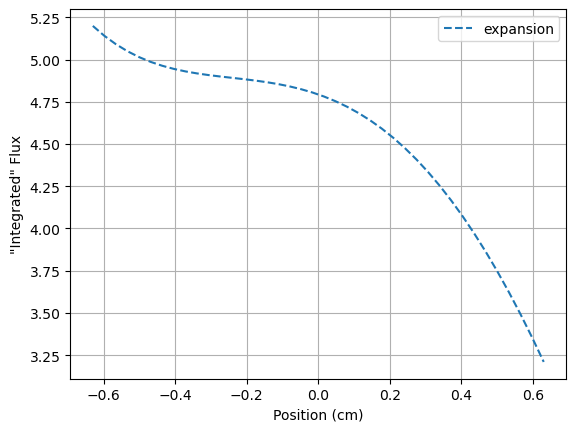

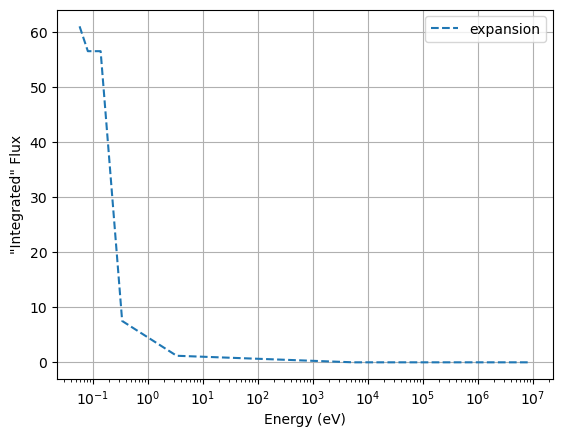

In [58]:
from pincell_moment_utils.plotting import plot_expansion_slice

plot_expansion_slice(incident_flux, 0, 0, incident=True)

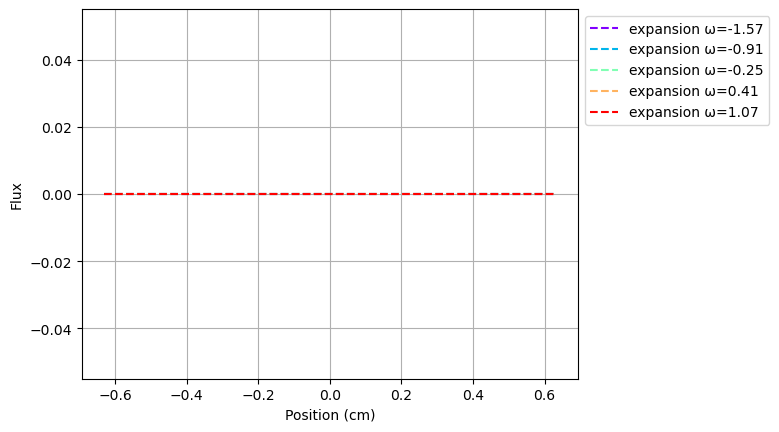

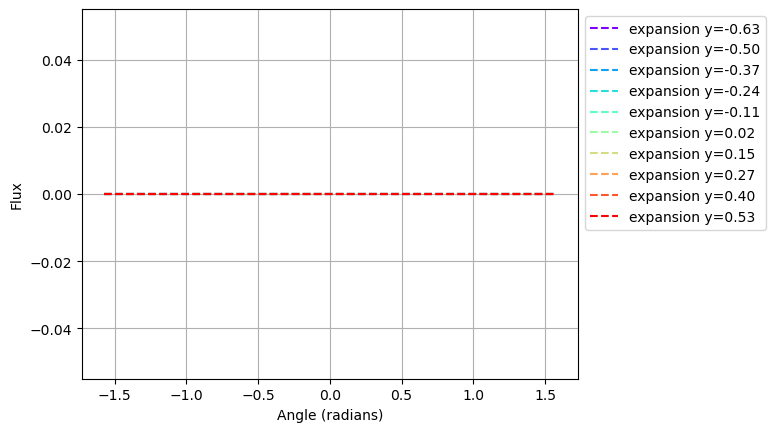

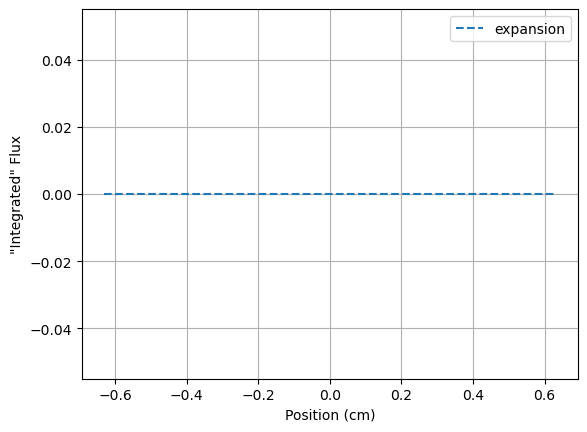

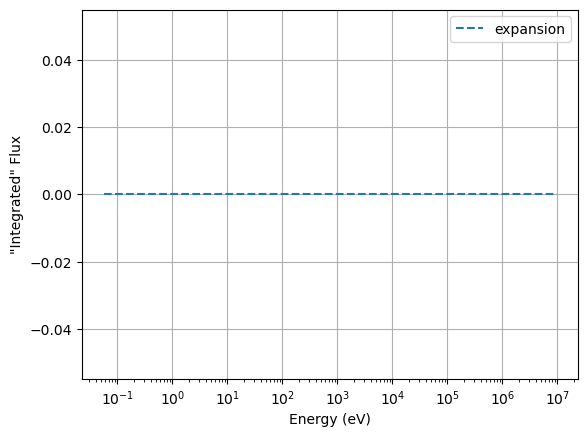

In [59]:
plot_expansion_slice(outgoing_flux, 0, 0, incident=False)